# <center>**Projeto de Disciplina de Algoritmos de Classificação  [25E1_2]**</center>
# <center>**Aluna: Rachel Reuters**</center>

## PARTE 1- MODULO KAGGLE: Kaggle Intro to Machine Learning

In [64]:
import pandas as pd
# Download latest version
melbourne_data   =  pd.read_csv('melb_data.csv', sep=',', decimal='.')
melbourne_data.describe()

Rooms         Price      Distance      Postcode      Bedroom2  \
count  13580.000000  1.358000e+04  13580.000000  13580.000000  13580.000000   
mean       2.937997  1.075684e+06     10.137776   3105.301915      2.914728   
std        0.955748  6.393107e+05      5.868725     90.676964      0.965921   
min        1.000000  8.500000e+04      0.000000   3000.000000      0.000000   
25%        2.000000  6.500000e+05      6.100000   3044.000000      2.000000   
50%        3.000000  9.030000e+05      9.200000   3084.000000      3.000000   
75%        3.000000  1.330000e+06     13.000000   3148.000000      3.000000   
max       10.000000  9.000000e+06     48.100000   3977.000000     20.000000   

           Bathroom           Car       Landsize  BuildingArea    YearBuilt  \
count  13580.000000  13518.000000   13580.000000   7130.000000  8205.000000   
mean       1.534242      1.610075     558.416127    151.967650  1964.684217   
std        0.691712      0.962634    3990.669241    541.014538    37.273762   
min        0.000000      0.000000       0.000000      0.000000  1196.000000   
25%        1.000000      1.000000     177.000000     93.000000  1940.000000   
50%        1.000000      2.000000     440.000000    126.000000  1970.000000   
75%        2.000000      2.000000     651.000000    174.000000  1999.000000   
max        8.000000     10.000000  433014.000000  44515.000000  2018.000000   

          Lattitude    Longtitude  Propertycount  
count  13580.000000  13580.000000   13580.000000  
mean     -37.809203    144.995216    7454.417378  
std        0.079260      0.103916    4378.581772  
min      -38.182550    144.431810     249.000000  
25%      -37.856822    144.929600    4380.000000  
50%      -37.802355    145.000100    6555.000000  
75%      -37.756400    145.058305   10331.000000  
max      -37.408530    145.526350   21650.000000

In [65]:
melbourne_data = melbourne_data.dropna(axis=0)

y = melbourne_data.Price

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']


In [66]:
from sklearn.tree import DecisionTreeRegressor

X = melbourne_data[melbourne_features]


# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

predict_tree = melbourne_model.predict(X)


In [67]:
X['RealPrice'] = y 
X['Predict'] = predict_tree

In [68]:
X

Rooms  Bathroom  Landsize  Lattitude  Longtitude  RealPrice    Predict
1          2       1.0     156.0  -37.80790   144.99340  1035000.0  1035000.0
2          3       2.0     134.0  -37.80930   144.99440  1465000.0  1465000.0
4          4       1.0     120.0  -37.80720   144.99410  1600000.0  1600000.0
6          3       2.0     245.0  -37.80240   144.99930  1876000.0  1876000.0
7          2       1.0     256.0  -37.80600   144.99540  1636000.0  1636000.0
...      ...       ...       ...        ...         ...        ...        ...
12205      3       2.0     972.0  -37.51232   145.13282   601000.0   601000.0
12206      3       1.0     179.0  -37.86558   144.90474  1050000.0  1050000.0
12207      1       1.0       0.0  -37.85588   144.89936   385000.0   385000.0
12209      2       1.0       0.0  -37.85581   144.99025   560000.0   560000.0
12212      6       3.0    1087.0  -37.81038   144.89389  2450000.0  2450000.0

[6196 rows x 7 columns]

In [69]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, predict_tree)

1115.7467183128902

In [70]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 22)
melbourne_model = DecisionTreeRegressor()
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

2529.0639122014204


In [71]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=22)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
best_mae= 999999
for max_leaf_nodes in [5, 50, 500, 5000,20000]:
    current_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    if current_mae <best_mae :
        best_mae = current_mae
        best_leaf_node  = max_leaf_nodes

print(f"Best leaf = {best_leaf_node}")
model = DecisionTreeRegressor(max_leaf_nodes=best_leaf_node, random_state=22)
model.fit(X, y)
preds_val = model.predict(val_X)


mae_final = mean_absolute_error(val_y, preds_val)
print(mae_final)

Best leaf = 5000
0.0


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=22)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

1564.0011555842486


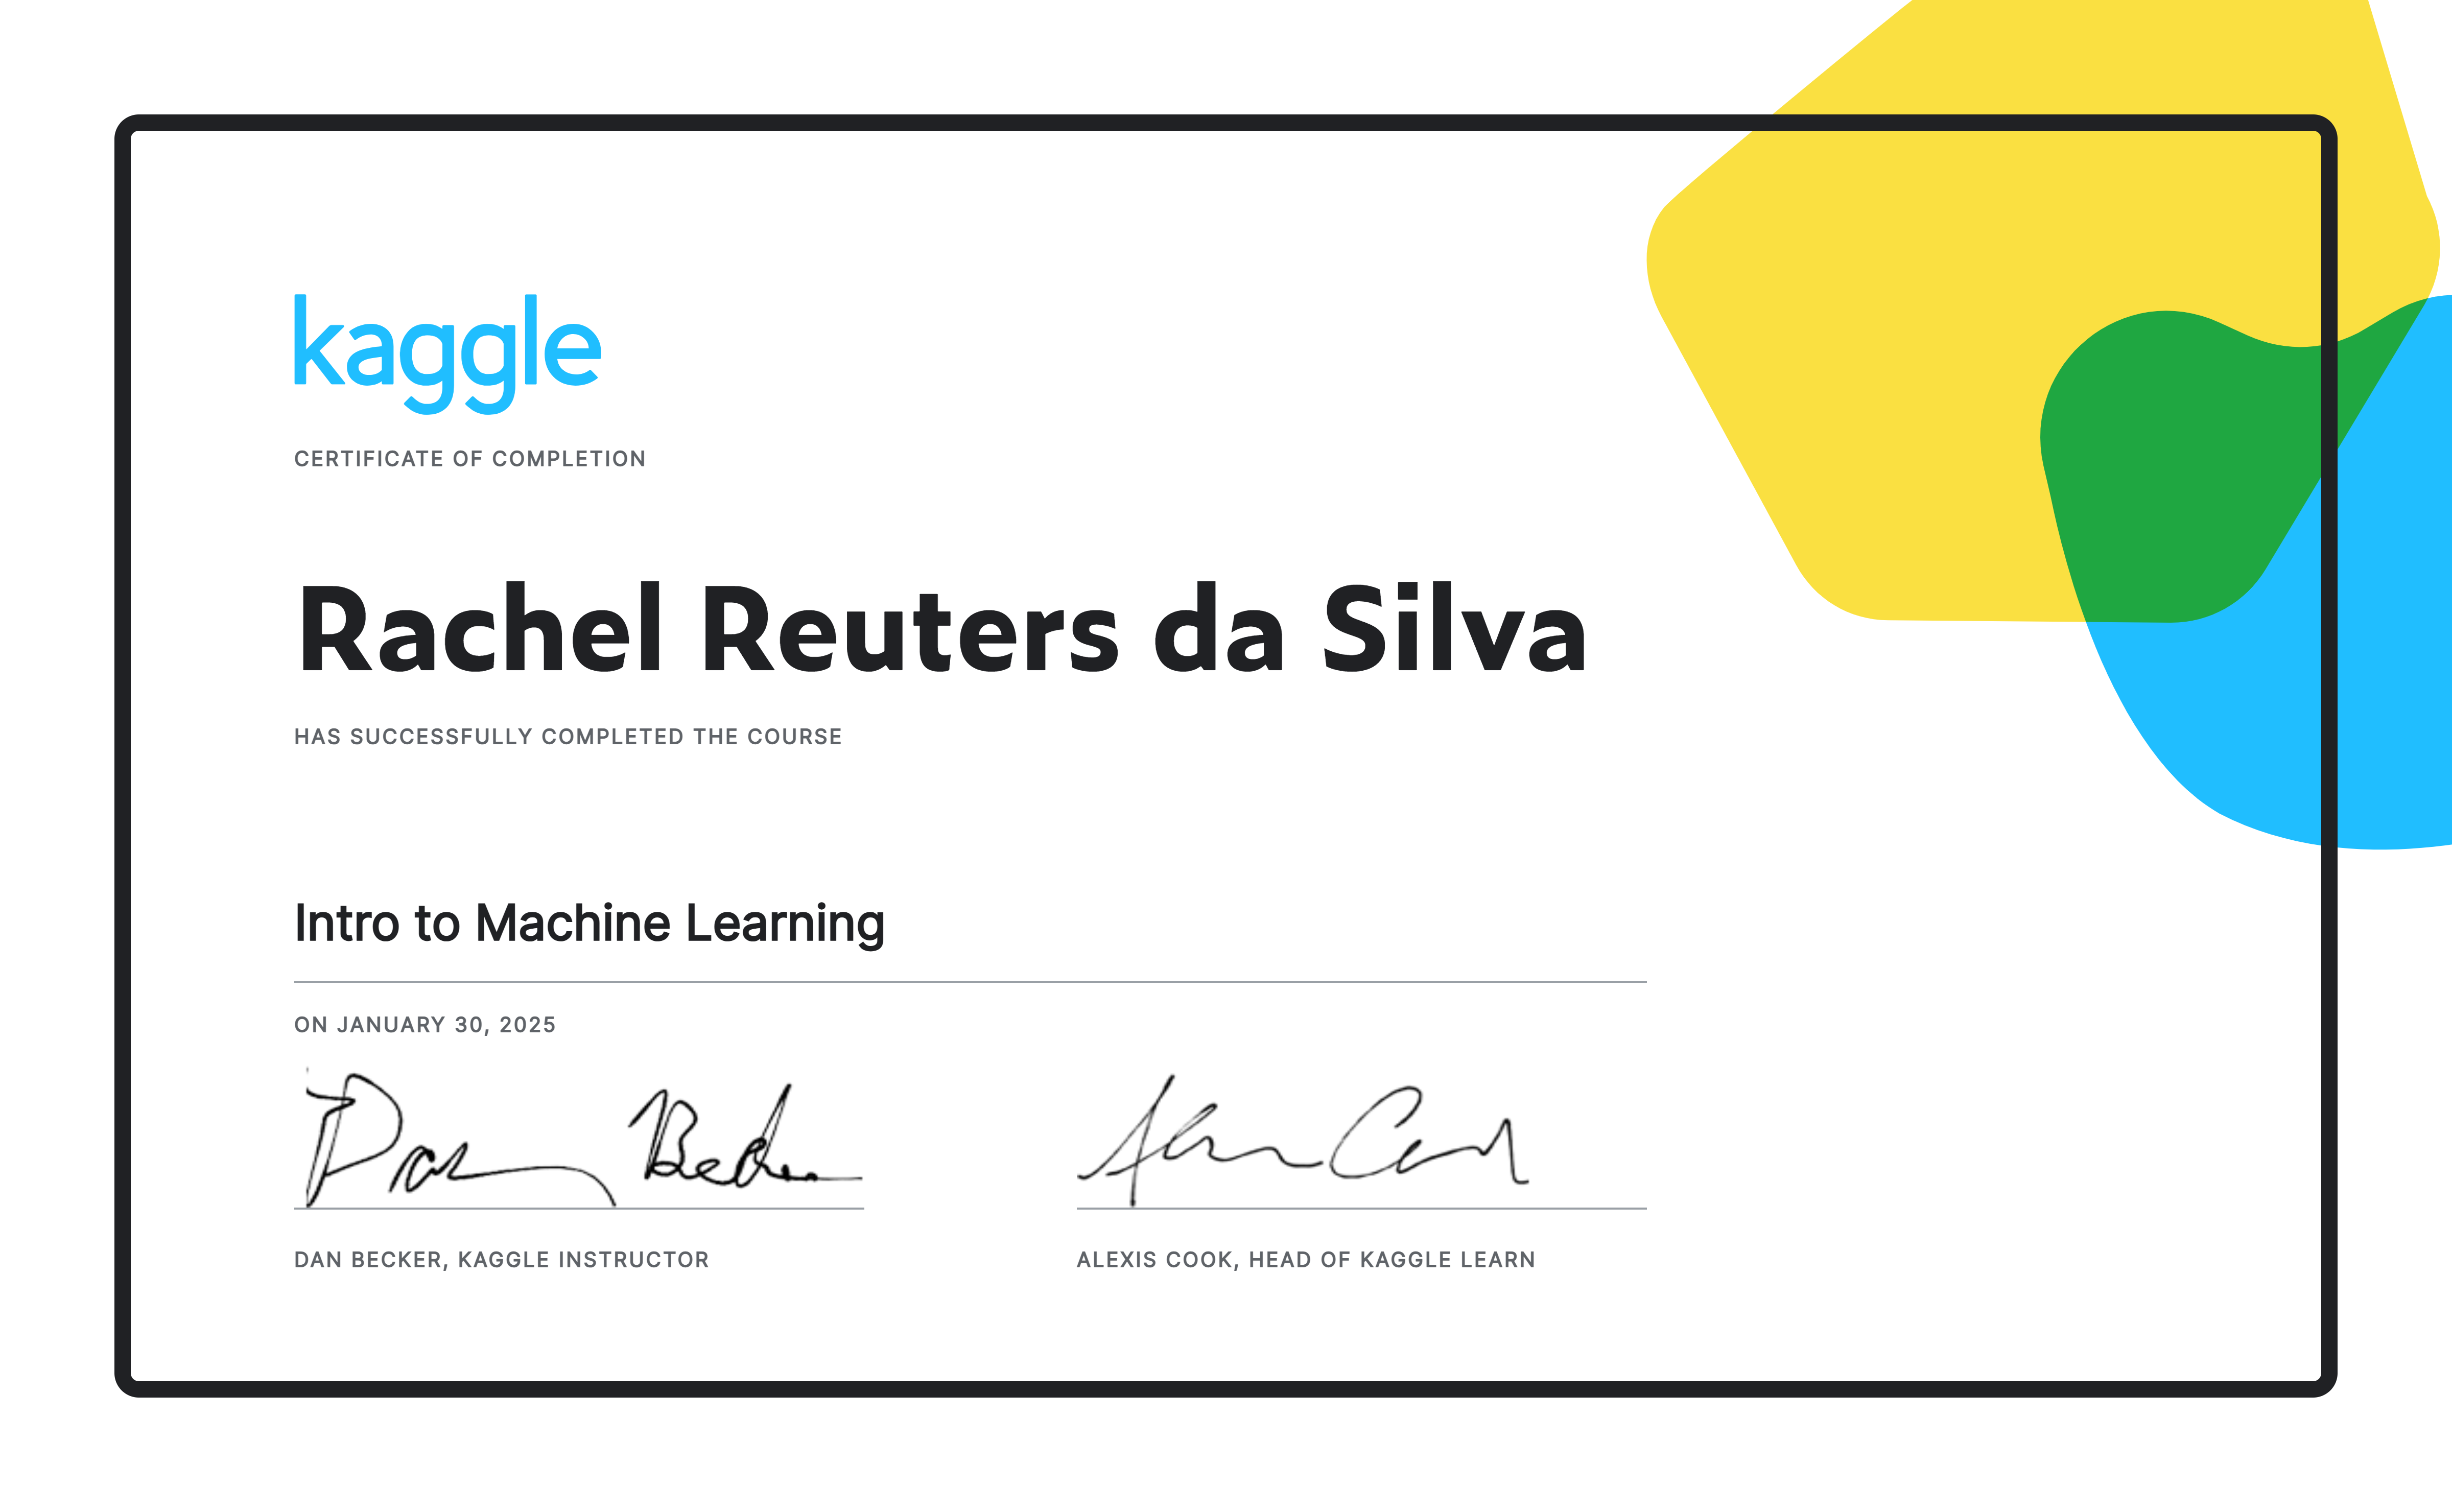

## PARTE 2 - BASE DE DADOS

In [73]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline


# Ignore all warnings
warnings.filterwarnings('ignore')

dataset_original = pd.read_csv('winequalityN.csv', sep=',', decimal='.')

dataset_filtrado = dataset_original[dataset_original['type'] == "white"]

dataset_filtrado['opinion'] = np.where(dataset_filtrado['quality'] > 5 , 1, 0)

dataset_filtrado.drop(columns='quality', inplace=True)

dataset_filtrado


type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0              0.27         0.36            20.7   
1     white            6.3              0.30         0.34             1.6   
2     white            8.1              0.28         0.40             6.9   
3     white            7.2              0.23         0.32             8.5   
4     white            7.2              0.23         0.32             8.5   
...     ...            ...               ...          ...             ...   
4893  white            6.2              0.21         0.29             1.6   
4894  white            6.6              0.32         0.36             8.0   
4895  white            6.5               NaN         0.19             1.2   
4896  white            5.5              0.29         0.30             1.1   
4897  white            6.0              0.21         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
4893      0.039                 24.0                  92.0  0.99114  3.27   
4894      0.047                 57.0                 168.0  0.99490  3.15   
4895      0.041                 30.0                 111.0  0.99254  2.99   
4896      0.022                 20.0                 110.0  0.98869  3.34   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  opinion  
0          0.45      8.8        1  
1          0.49      9.5        1  
2          0.44     10.1        1  
3          0.40      9.9        1  
4          0.40      9.9        1  
...         ...      ...      ...  
4893       0.50     11.2        1  
4894       0.46      9.6        0  
4895       0.46      9.4        1  
4896       0.38     12.8        1  
4897       0.32     11.8        1  

[4898 rows x 13 columns]

## PARTE 3 - PRE-PROCESSAMENTO E ANÁLISE DOS DADOS

Analisando as colunas que possuem linhas vazias,as colunas provavelmente tem dados vazios provavelmente por falta de informacao ou deixaram de anotar. Existem muitas possibilidades, porém para o problema proposto acredito que preencher com a média pode ser uma boa alternativa:

In [74]:
#Verificando dados NULOS
print(dataset_filtrado.isna().sum())

type                    0
fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
opinion                 0
dtype: int64


In [75]:
dataset_filtrado[dataset_filtrado.columns] = dataset_filtrado[dataset_filtrado.columns].fillna(dataset_filtrado[dataset_filtrado.columns].mean())

Verificando se existem dados duplicados:

In [76]:

dataset_filtrado.duplicated().sum()



928

In [77]:
dataset_vinho_branco_tratado = dataset_filtrado.drop_duplicates()
dataset_vinho_branco_tratado

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0          0.270000         0.36            20.7   
1     white            6.3          0.300000         0.34             1.6   
2     white            8.1          0.280000         0.40             6.9   
3     white            7.2          0.230000         0.32             8.5   
6     white            6.2          0.320000         0.16             7.0   
...     ...            ...               ...          ...             ...   
4893  white            6.2          0.210000         0.29             1.6   
4894  white            6.6          0.320000         0.36             8.0   
4895  white            6.5          0.278252         0.19             1.2   
4896  white            5.5          0.290000         0.30             1.1   
4897  white            6.0          0.210000         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
4893      0.039                 24.0                  92.0  0.99114  3.27   
4894      0.047                 57.0                 168.0  0.99490  3.15   
4895      0.041                 30.0                 111.0  0.99254  2.99   
4896      0.022                 20.0                 110.0  0.98869  3.34   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  opinion  
0          0.45      8.8        1  
1          0.49      9.5        1  
2          0.44     10.1        1  
3          0.40      9.9        1  
6          0.47      9.6        1  
...         ...      ...      ...  
4893       0.50     11.2        1  
4894       0.46      9.6        0  
4895       0.46      9.4        1  
4896       0.38     12.8        1  
4897       0.32     11.8        1  

[3970 rows x 13 columns]

Analisando os tipos das colunas da base de dados:

In [78]:

variable = dataset_vinho_branco_tratado.columns
data_input_analysis = pd.DataFrame(dataset_vinho_branco_tratado.dtypes)
data_input_analysis = data_input_analysis.rename(columns={0: 'Type'})

conditions = [
    (data_input_analysis['Type'] == "object"),
    (data_input_analysis['Type'] == "float64"), 
    (data_input_analysis['Type'] == "int64") | (data_input_analysis['Type'] == "int32")
]

data_input_analysis["Type"] = np.select(conditions, ["categorical", "continuous", "discrete"])

data_input_analysis["Average"] = dataset_vinho_branco_tratado[data_input_analysis.index].mean()

data_input_analysis["StandardDeviation"] = dataset_vinho_branco_tratado[data_input_analysis.index].std()

data_input_analysis["MissingValues"] = dataset_vinho_branco_tratado[data_input_analysis.index].isna().any()

data_input_analysis

Type     Average  StandardDeviation  \
type                  categorical         NaN                NaN   
fixed acidity          continuous    6.840905           0.865528   
volatile acidity       continuous    0.280637           0.103486   
citric acid            continuous    0.334551           0.122449   
residual sugar         continuous    5.920727           4.863427   
chlorides              continuous    0.045895           0.023079   
free sulfur dioxide    continuous   34.909698          17.218706   
total sulfur dioxide   continuous  137.248992          43.133975   
density                continuous    0.993792           0.002905   
pH                     continuous    3.195297           0.151345   
sulphates              continuous    0.490398           0.113566   
alcohol                continuous   10.588324           1.217302   
opinion                  discrete    0.659698           0.473870   

                      MissingValues  
type                          False  
fixed acidity                 False  
volatile acidity              False  
citric acid                   False  
residual sugar                False  
chlorides                     False  
free sulfur dioxide           False  
total sulfur dioxide          False  
density                       False  
pH                            False  
sulphates                     False  
alcohol                       False  
opinion                       False


Selecionando as colunas continuas para serem as features pois a unica categorica eh de tipo de vinho e 
so estamos analisando inicialmenteo vinho branco.
Pelas distribuicoes, os valores estao fora da mesma escala e posteriormente vai ser necessario aplicar uma padronizacao dos dados. 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


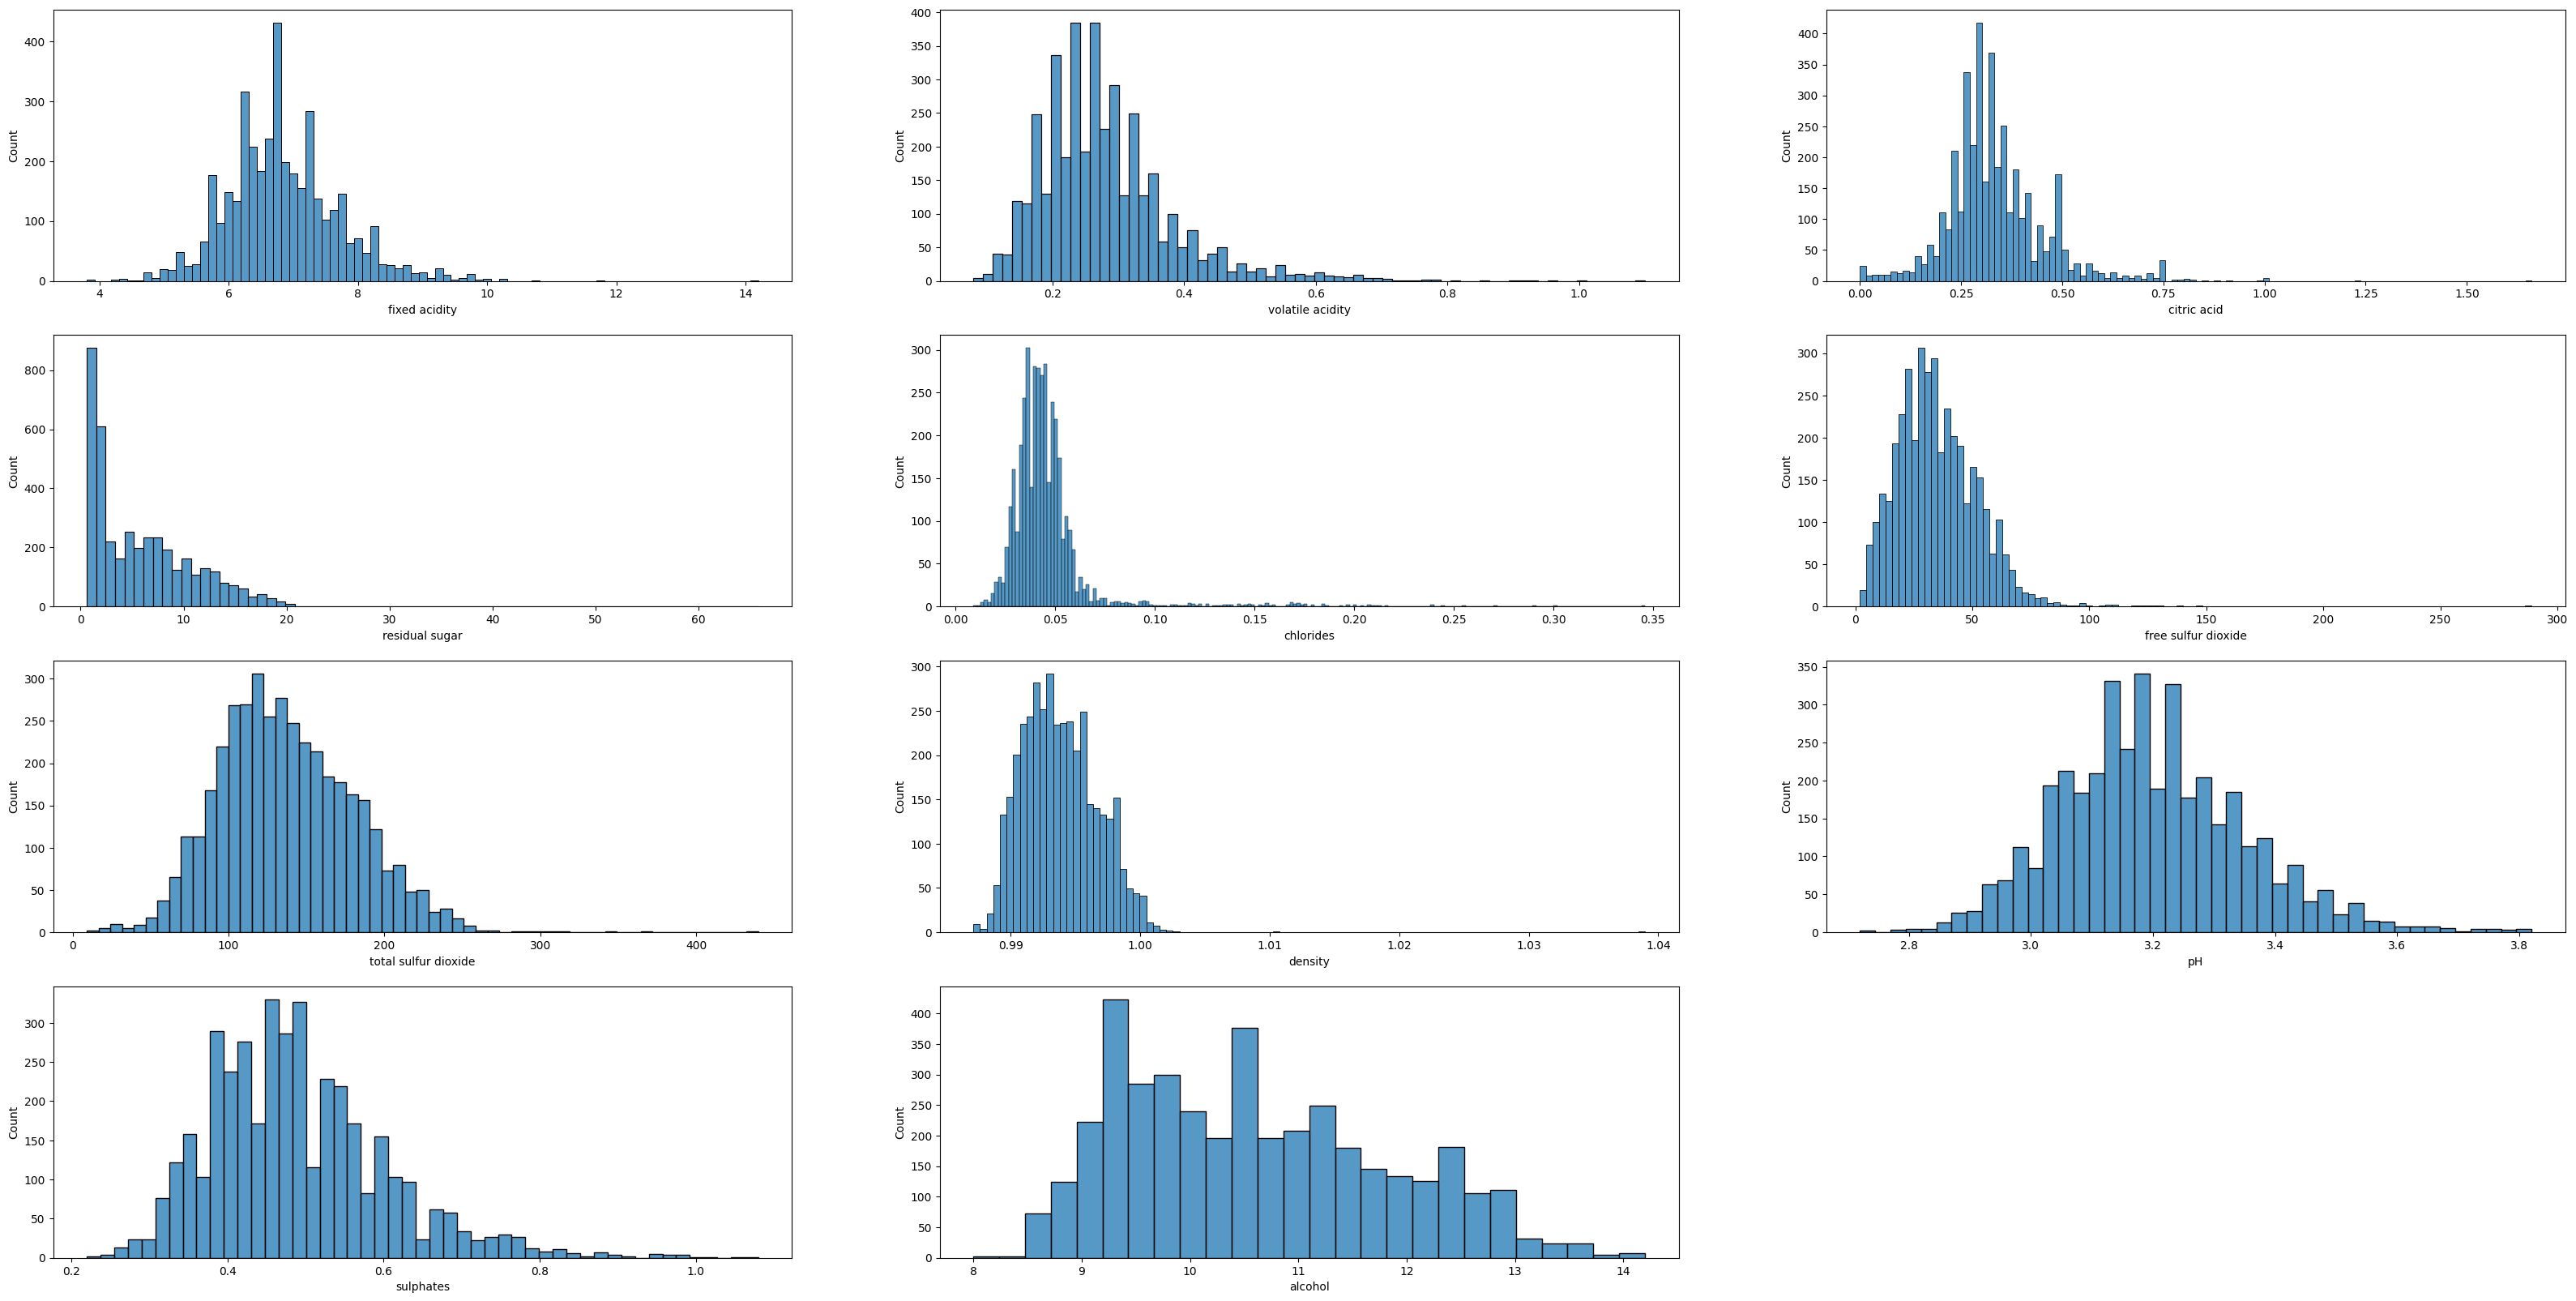

In [79]:


numerical_columns = data_input_analysis.loc[data_input_analysis['Type'] == "continuous"].index
print(numerical_columns)


#Verificando distribuicao dos dados
plt.figure(figsize=(40, 20))

for index, value in enumerate(numerical_columns):
    plt.subplot(4, 3,index+1)
    sns.histplot(dataset_vinho_branco_tratado[value])
    plt.xlabel(numerical_columns[index])

Verificando balanceamento dos dados, podemos ver que trata-se de uma base desbalanceada, com maior numero de bons vinhos.

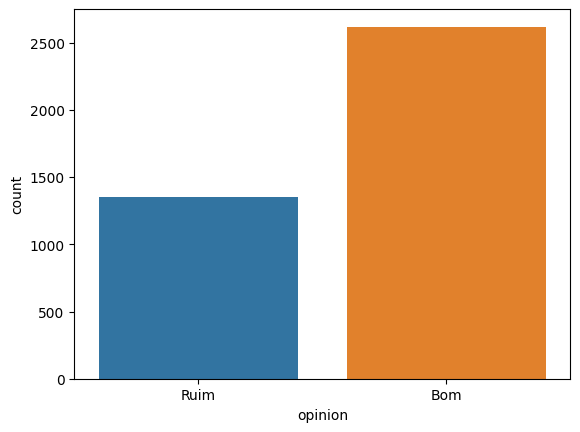

In [80]:
ax  = sns.countplot(x=dataset_vinho_branco_tratado["opinion"])
new_labels = ['Ruim', 'Bom']
ax.set_xticklabels(new_labels)
plt.show()


Analisando a distribuicao 2 a 2 nenhuma parece linearmente separavel. 

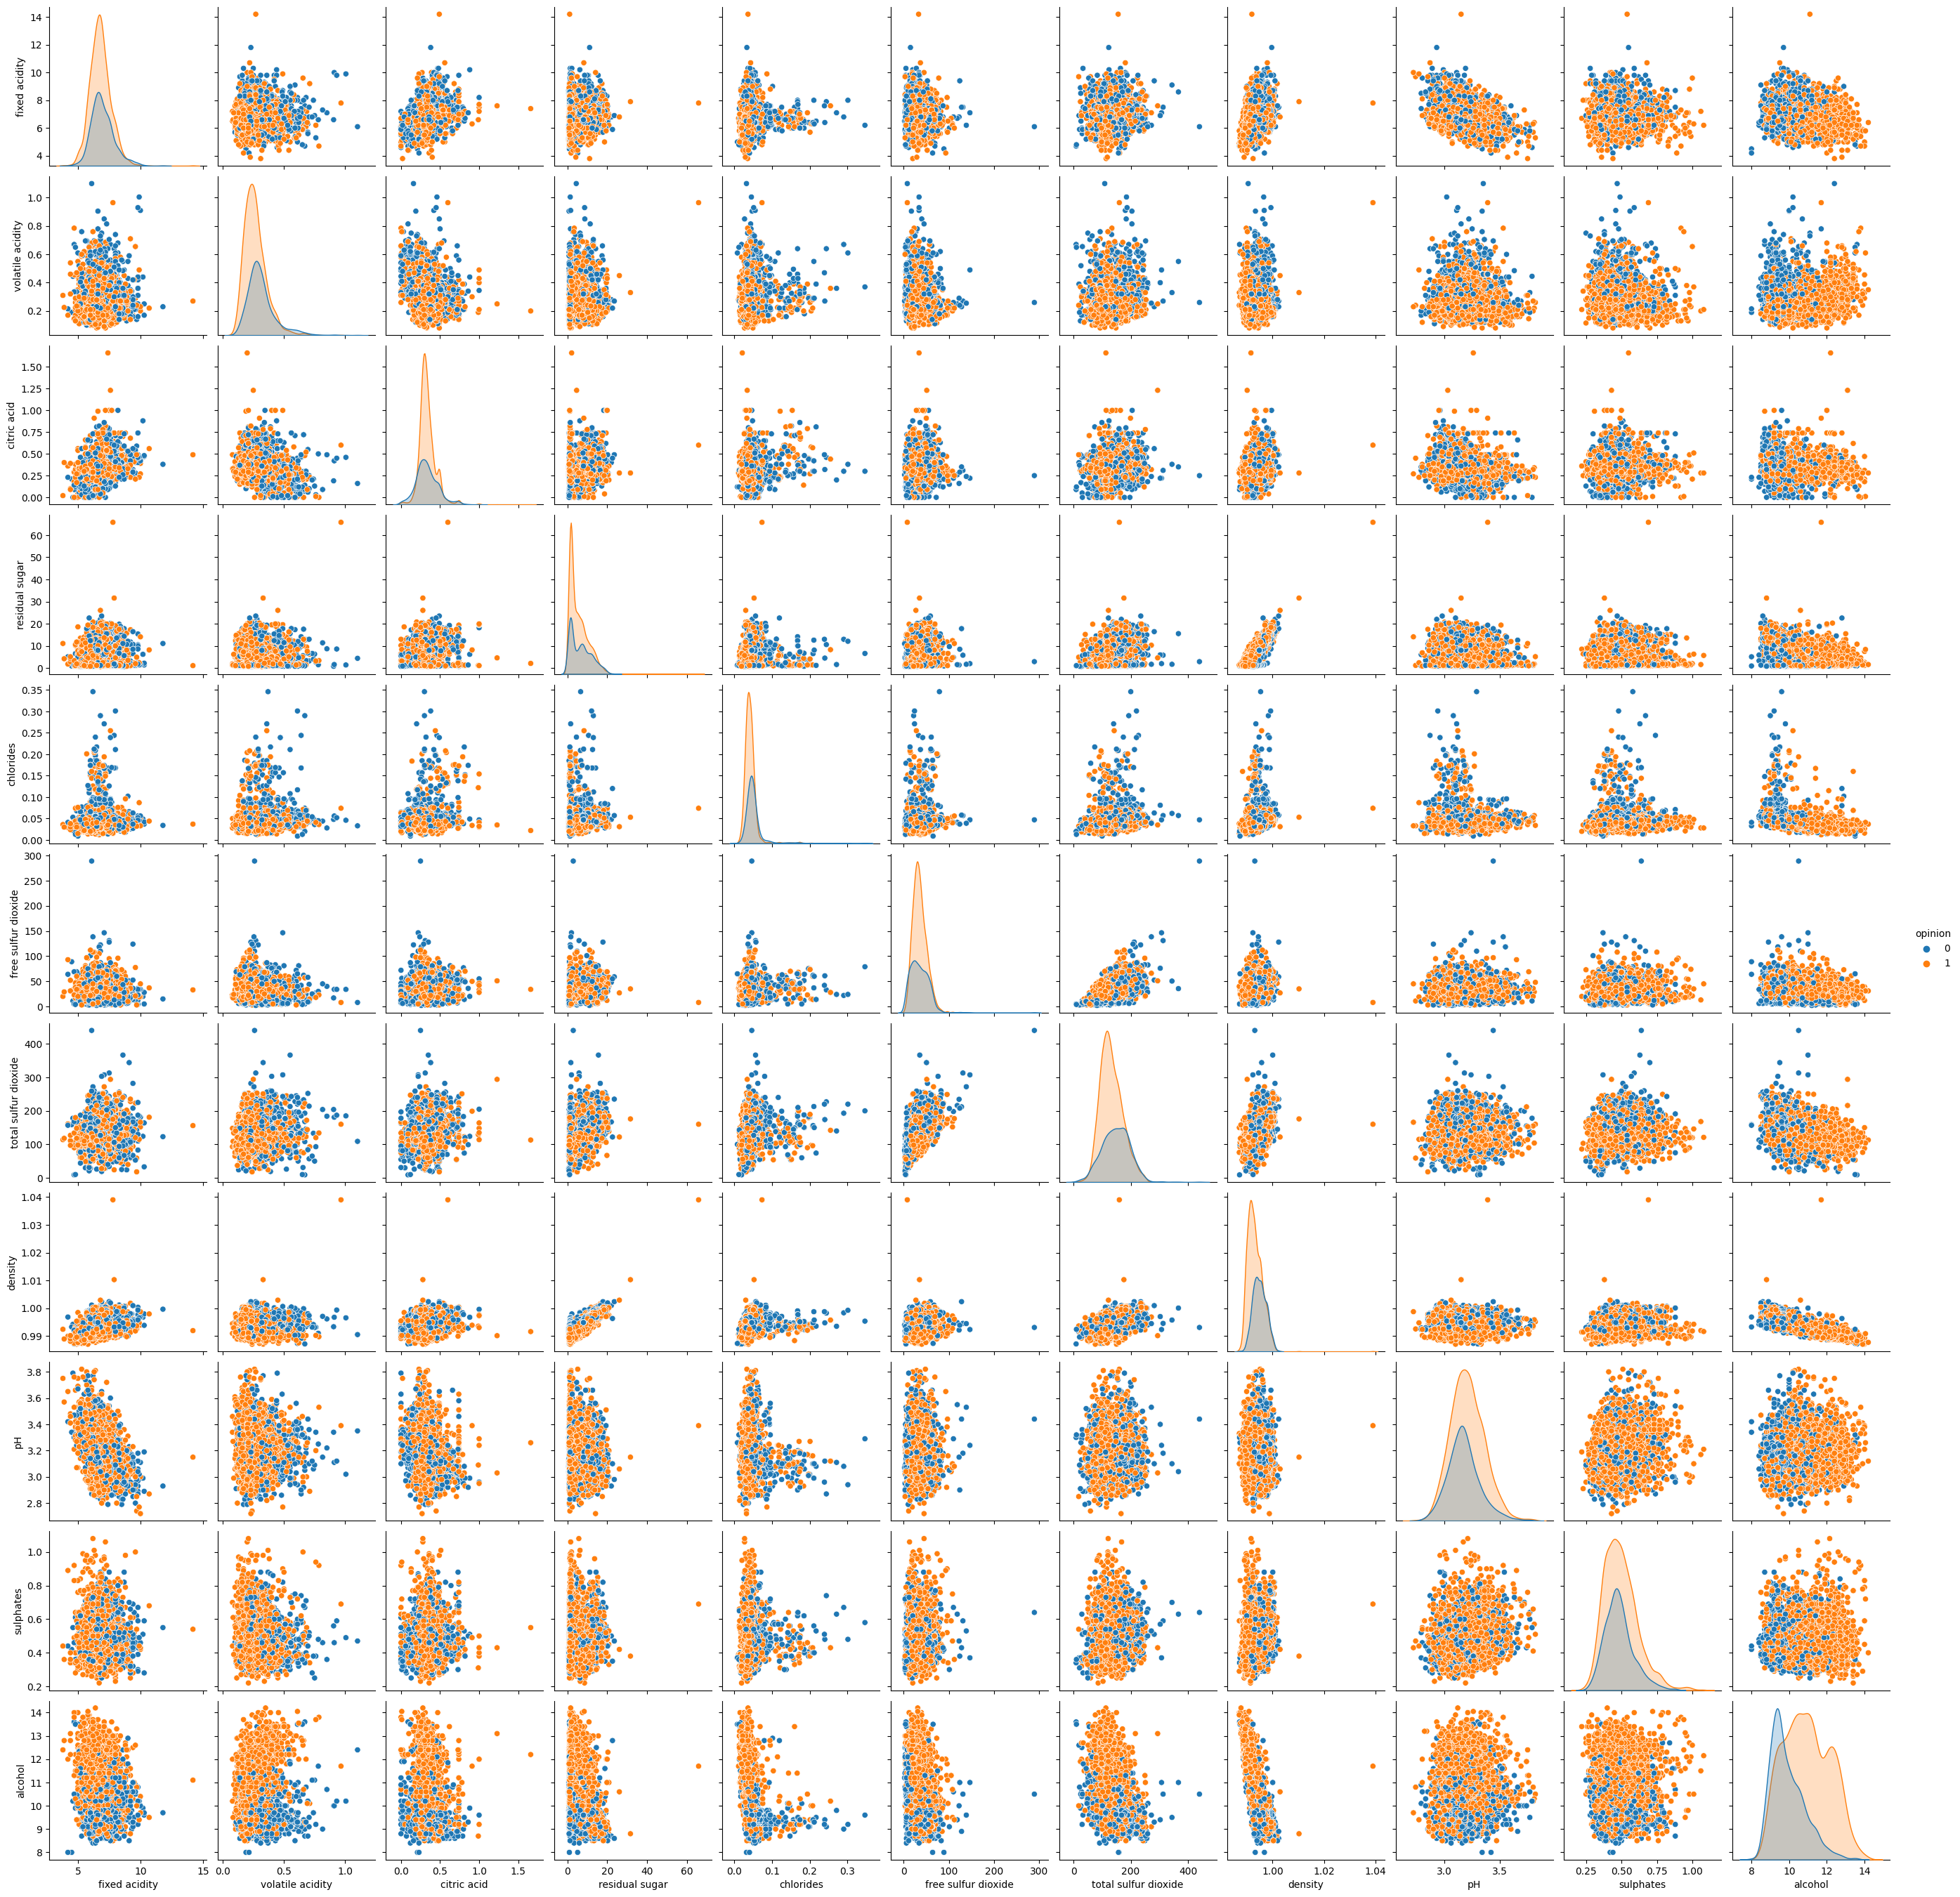

In [81]:

sns.pairplot(dataset_vinho_branco_tratado, hue='opinion')

Separando o X e Y:

In [82]:

X= dataset_vinho_branco_tratado[numerical_columns]
y = dataset_vinho_branco_tratado[["opinion"]]


## PARTE 4 - TREINAMENTO E CLASSIFICAÇÃO

### 4.a - Descreva as etapas necessárias para criar um modelo de classificação eficiente.


Entendimento do Problema: Compreenda claramente o problema que você está tentando resolver e defina o objetivo da classificação.

Coleta de Dados: Obtenha um conjunto de dados relevante e de qualidade. Os dados devem ser representativos do problema que você está tentando resolver.

Pré-processamento dos Dados:

Limpeza de Dados: Remova valores ausentes, duplicados e outliers.

Transformação de Dados: Converta variáveis categóricas em variáveis numéricas (por exemplo, usando one-hot encoding).

Normalização/Escala: Normalize ou escale os dados se necessário.

Divisão dos Dados: Divida os dados em conjuntos de treinamento, validação e teste. Uma divisão comum é 70% para treinamento, 15% para validação e 15% para teste.

Seleção de Recursos (Feature Selection): Identifique as variáveis mais relevantes para o modelo. Isso pode ser feito usando técnicas como correlação, análise de variância (ANOVA) ou métodos de seleção automatizada.

Escolha do Algoritmo de Classificação: Escolha um ou mais algoritmos de classificação adequados para o seu problema. 

Treinamento do Modelo: Treine o modelo usando o conjunto de treinamento. Ajuste os hiperparâmetros do modelo usando validação cruzada para melhorar o desempenho.

Avaliação do Modelo: Avalie o desempenho do modelo usando métricas apropriadas, como acurácia, precisão, recall, F1-score e a curva ROC-AUC, aplicando-as ao conjunto de validação.

Ajuste e Otimização do Modelo: Faça ajustes e otimizações conforme necessário. Isso pode incluir ajuste de hiperparâmetros, engenharia de recursos adicionais ou tentativa de diferentes algoritmos.

Validação Final: Teste o modelo final no conjunto de teste para obter uma avaliação imparcial do desempenho.

Implantação do Modelo: Se o modelo estiver pronto para uso, implante-o no ambiente de produção.

Monitoramento e Manutenção: Monitore o desempenho do modelo em produção e faça atualizações e manutenções conforme necessário para garantir que ele continue a funcionar corretamente.

### 4.b Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos

ii. a média e desvio da precisão dos modelos obtidos

iii. a média e desvio da recall dos modelos obtidos

iv. a média e desvio do f1-score dos modelos obtidos.

In [100]:
#Criando uma funcao generica com GS
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import  RobustScaler

def calculate_metrics_with_CV_for_model(model,model_name, x_train, x_test, y_train, y_test, kfold, paramGrid, isRandom = True, metrics = ["accuracy","recall","precision","f1"]):
    skfold = StratifiedKFold(n_splits=kfold,shuffle=True, random_state=22)
    final_results_full = pd.DataFrame()
    best_results_per_metric = pd.DataFrame()
    for metric in metrics:
        if( isRandom ):
            random_search = RandomizedSearchCV(
                estimator=model,
                param_distributions=paramGrid,
                scoring=metric,
                cv=skfold,
                refit=True,
                error_score=0,
                verbose=0,
                n_iter = 100
            )
        else :
            random_search = GridSearchCV(
                estimator=model,
                param_grid=paramGrid,
                scoring=metric,
                cv=skfold,
                refit=True,
                error_score=0,
                verbose=0
            )

        random_search.fit(x_train, y_train)

        results = pd.DataFrame(random_search.cv_results_)
        best_result = results.loc[results['rank_test_score'] == 1].head(1)

        best_result['metric'] = metric
        best_result['model'] = model_name
        results['metric'] = metric
        results['model'] = model_name

        final_results_full = pd.concat([final_results_full, results], ignore_index=True)
        best_results_per_metric = pd.concat([best_results_per_metric, best_result], ignore_index=True)

        y_predict_prob_test = random_search.best_estimator_.predict_proba(x_test)
        fpr, tpr, _ = roc_curve(y_test, [c[1] for c in y_predict_prob_test])
        roc_auc = roc_auc_score(y_test, [c[1] for c in y_predict_prob_test])
        pd.set_option('display.max_colwidth', None)
                      
        print(best_result[["mean_test_score", "std_test_score", "metric", "model", "params"]])
        
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')        
        plt.plot([0, 1], [0, 1], label='Classificador Aleatório')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title(f'ROC AUC {model_name}, metrica: {metric}')
        plt.legend(loc="lower right")
        plt.show()


    return final_results_full, best_results_per_metric


   mean_test_score  std_test_score    metric               model  \
0         0.743084        0.025093  accuracy  LogisticRegression   

                                                                         params  
0  {'rl__solver': 'liblinear', 'rl__penalty': 'l2', 'rl__C': 4.629266655933716}  


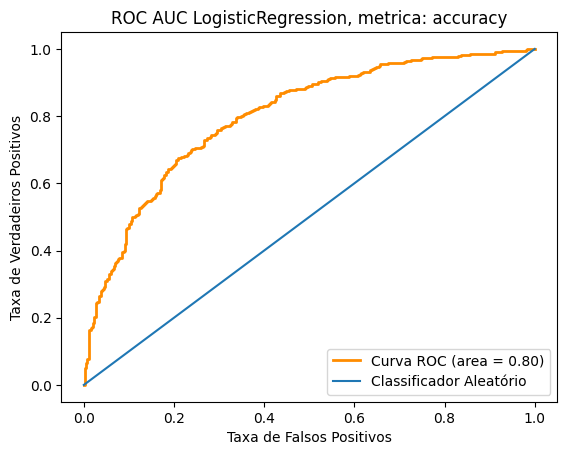

    mean_test_score  std_test_score  metric               model  \
15         0.861416        0.023737  recall  LogisticRegression   

                                                                        params  
15  {'rl__solver': 'lbfgs', 'rl__penalty': 'l2', 'rl__C': 0.14939529275478922}  


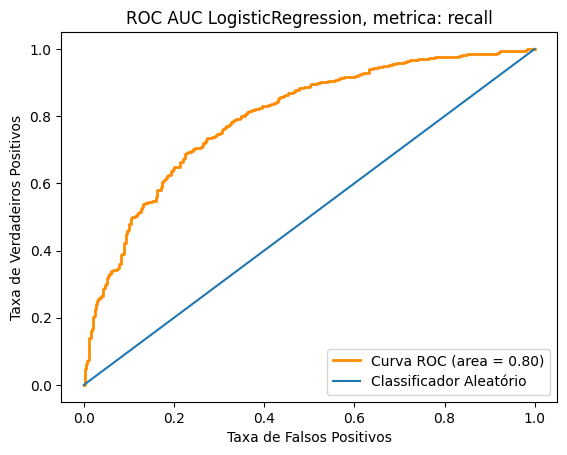

    mean_test_score  std_test_score     metric               model  \
30          0.77651         0.01615  precision  LogisticRegression   

                                                                           params  
30  {'rl__solver': 'liblinear', 'rl__penalty': 'l1', 'rl__C': 0.5184662580353784}  


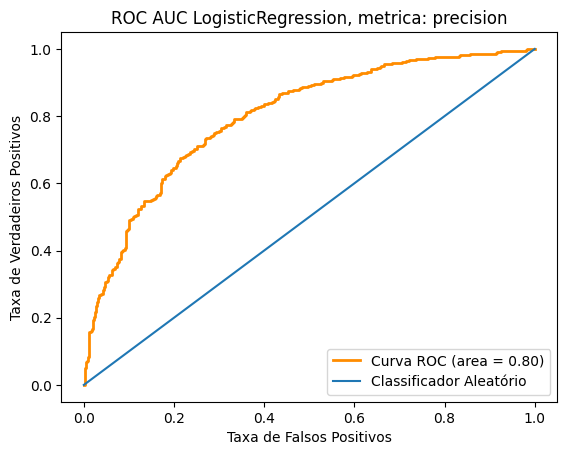

    mean_test_score  std_test_score metric               model  \
12         0.814923        0.019054     f1  LogisticRegression   

                                                                         params  
12  {'rl__solver': 'newton-cg', 'rl__penalty': 'l2', 'rl__C': 9.97738213301169}  


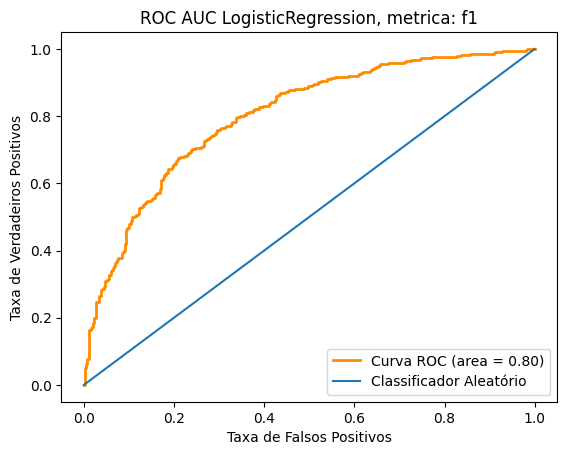

In [84]:


#Metricas para a RL
pipe_rl = Pipeline([
    ('scaler', RobustScaler()),
    ('rl', LogisticRegression(random_state=22))
])

model_name = "LogisticRegression"
kfold = 10

paramsGrid = {
    'rl__penalty': ['l1', 'l2', 'elasticnet'],
    'rl__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'rl__C': np.random.uniform(0.01, 10, 20),
}

# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=22)


result_rl_GS_full,result_rl_GS_best_by_metric  = calculate_metrics_with_CV_for_model(pipe_rl,model_name,x_train, x_test, y_train, y_test , kfold, paramsGrid)


In [85]:
result_rl_GS_best_by_metric

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.013152      0.000451         0.002697        0.000789   
1       0.029754      0.001581         0.003810        0.000398   
2       0.020730      0.002807         0.003803        0.000594   
3       0.063337      0.007260         0.003503        0.000505   

  param_rl__solver param_rl__penalty param_rl__C  \
0        liblinear                l2    4.629267   
1            lbfgs                l2    0.149395   
2        liblinear                l1    0.518466   
3        newton-cg                l2    9.977382   

                                                                          params  \
0   {'rl__solver': 'liblinear', 'rl__penalty': 'l2', 'rl__C': 4.629266655933716}   
1     {'rl__solver': 'lbfgs', 'rl__penalty': 'l2', 'rl__C': 0.14939529275478922}   
2  {'rl__solver': 'liblinear', 'rl__penalty': 'l1', 'rl__C': 0.5184662580353784}   
3    {'rl__solver': 'newton-cg', 'rl__penalty': 'l2', 'rl__C': 9.97738213301169}   

   split0_test_score  split1_test_score  ...  split5_test_score  \
0           0.737410           0.762590  ...           0.784173   
1           0.857923           0.896175  ...           0.874317   
2           0.781095           0.783654  ...           0.785366   
3           0.810390           0.831633  ...           0.845361   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  \
0           0.733813           0.751799           0.751799           0.772563   
1           0.842391           0.907609           0.858696           0.863388   
2           0.784615           0.767123           0.791878           0.801020   
3           0.807388           0.827930           0.818898           0.834646   

   mean_test_score  std_test_score  rank_test_score     metric  \
0         0.743084        0.025093                1   accuracy   
1         0.861416        0.023737                1     recall   
2         0.776510        0.016150                1  precision   
3         0.814923        0.019054                1         f1   

                model  
0  LogisticRegression  
1  LogisticRegression  
2  LogisticRegression  
3  LogisticRegression  

[4 rows x 23 columns]

### 4.c Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos

ii. a média e desvio da precisão dos modelos obtidos

iii. a média e desvio da recall dos modelos obtidos

iv. a média e desvio do f1-score dos modelos obtidos

    mean_test_score  std_test_score    metric         model  \
42         0.736959        0.028583  accuracy  DecisionTree   

                                                                       params  
42  {'dt__max_features': 'sqrt', 'dt__max_depth': 8, 'dt__criterion': 'gini'}  


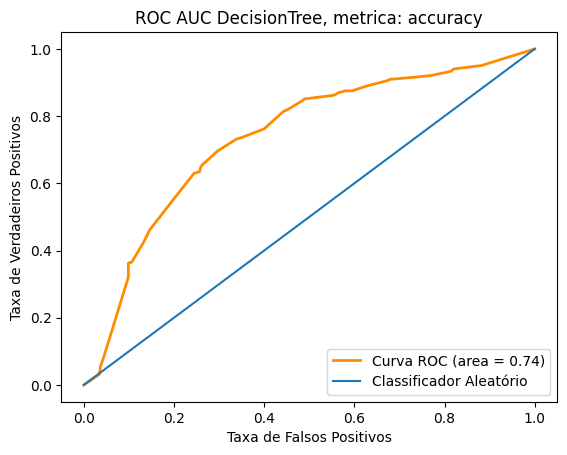

    mean_test_score  std_test_score  metric         model  \
25         0.872885        0.058195  recall  DecisionTree   

                                                                          params  
25  {'dt__max_features': 'log2', 'dt__max_depth': 4, 'dt__criterion': 'entropy'}  


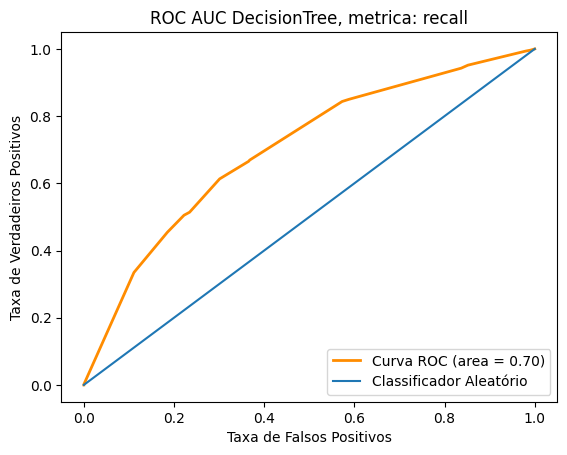

    mean_test_score  std_test_score     metric         model  \
28         0.801225        0.027825  precision  DecisionTree   

                                                                       params  
28  {'dt__max_features': 'auto', 'dt__max_depth': 8, 'dt__criterion': 'gini'}  


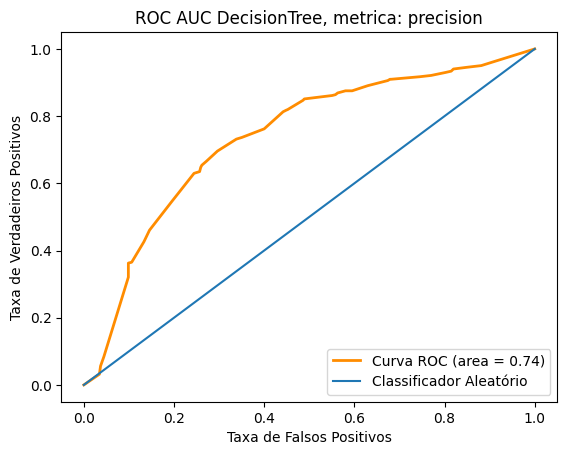

    mean_test_score  std_test_score metric         model  \
11         0.803938        0.020398     f1  DecisionTree   

                                                                       params  
11  {'dt__max_features': 'log2', 'dt__max_depth': 6, 'dt__criterion': 'gini'}  


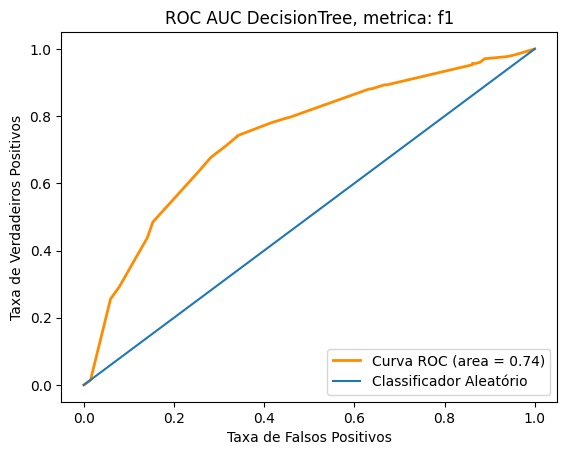

In [86]:
from sklearn.tree import DecisionTreeClassifier

#Metricas para a Arvore de decisao

pipe_dt = Pipeline([
    ('scaler', RobustScaler()),
    ('dt', DecisionTreeClassifier(random_state=22))
])

model_name = "DecisionTree"
kfold = 10

paramsGrid = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'],
    'dt__max_depth': range(2, 20),
    'dt__max_features': ['auto', 'sqrt', 'log2'],    
}

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=22)

result_dt_GS_full,result_dt_GS_best_by_metric  = calculate_metrics_with_CV_for_model(pipe_dt,model_name,x_train, x_test, y_train, y_test , kfold, paramsGrid)



In [87]:
result_dt_GS_best_by_metric

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.013306      0.000465         0.002560        0.000471   
1       0.011415      0.000801         0.003828        0.000629   
2       0.013077      0.000792         0.003199        0.000401   
3       0.012020      0.000506         0.003308        0.000464   

  param_dt__max_features param_dt__max_depth param_dt__criterion  \
0                   sqrt                   8                gini   
1                   log2                   4             entropy   
2                   auto                   8                gini   
3                   log2                   6                gini   

                                                                         params  \
0     {'dt__max_features': 'sqrt', 'dt__max_depth': 8, 'dt__criterion': 'gini'}   
1  {'dt__max_features': 'log2', 'dt__max_depth': 4, 'dt__criterion': 'entropy'}   
2     {'dt__max_features': 'auto', 'dt__max_depth': 8, 'dt__criterion': 'gini'}   
3     {'dt__max_features': 'log2', 'dt__max_depth': 6, 'dt__criterion': 'gini'}   

   split0_test_score  split1_test_score  ...  split5_test_score  \
0           0.733813           0.769784  ...           0.791367   
1           0.961749           0.890710  ...           0.885246   
2           0.788360           0.814815  ...           0.861272   
3           0.817481           0.811518  ...           0.811268   

   split6_test_score  split7_test_score  split8_test_score  split9_test_score  \
0           0.708633           0.708633           0.751799           0.747292   
1           0.820652           0.875000           0.923913           0.945355   
2           0.797688           0.775401           0.828571           0.789744   
3           0.763736           0.813131           0.827225           0.829897   

   mean_test_score  std_test_score  rank_test_score     metric         model  
0         0.736959        0.028583                1   accuracy  DecisionTree  
1         0.872885        0.058195                1     recall  DecisionTree  
2         0.801225        0.027825                1  precision  DecisionTree  
3         0.803938        0.020398                1         f1  DecisionTree  

[4 rows x 23 columns]

### 4.d Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:
i. a média e desvio da acurácia dos modelos obtidos

ii. a média e desvio da precisão dos modelos obtidos

iii. a média e desvio da recall dos modelos obtidos

iv. a média e desvio do f1-score dos modelos obtidos

    mean_test_score  std_test_score    metric model  \
50          0.76359        0.028417  accuracy   SVM   

                                                                                    params  
50  {'svm__kernel': 'rbf', 'svm__gamma': 0.4798323982687018, 'svm__C': 1.2188464254109543}  


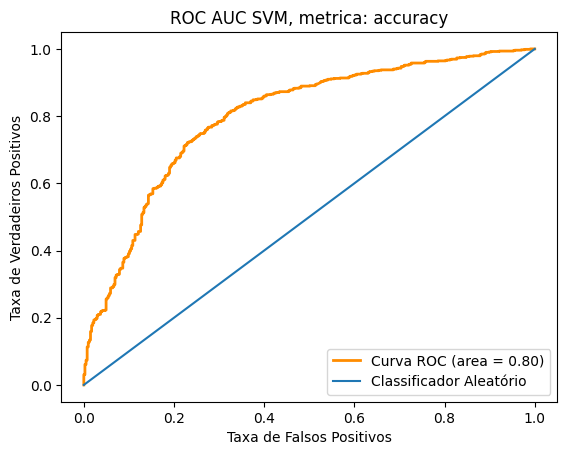

    mean_test_score  std_test_score  metric model  \
47         0.990728         0.00599  recall   SVM   

                                                                                 params  
47  {'svm__kernel': 'rbf', 'svm__gamma': 9.83360322446072, 'svm__C': 5.265361682267066}  


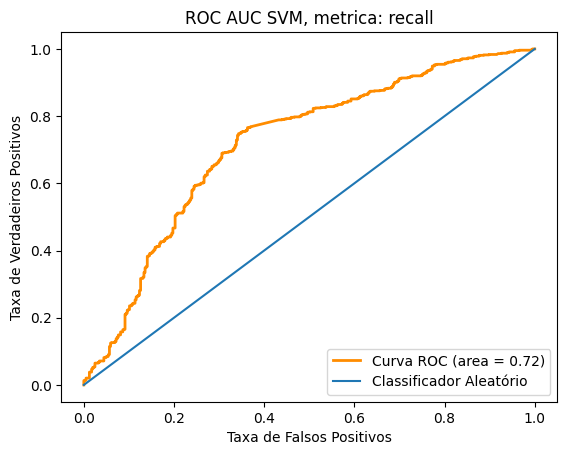

    mean_test_score  std_test_score     metric model  \
37         0.793018        0.021173  precision   SVM   

                                                                                   params  
37  {'svm__kernel': 'rbf', 'svm__gamma': 0.3624164302554771, 'svm__C': 4.772405607247355}  


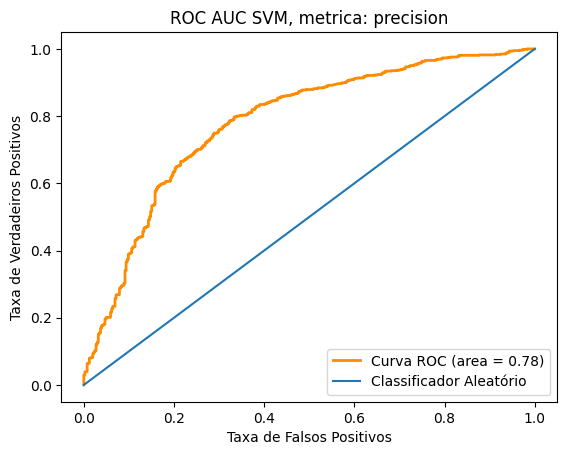

    mean_test_score  std_test_score metric model  \
15         0.819894        0.019361     f1   SVM   

                                                                                    params  
15  {'svm__kernel': 'linear', 'svm__gamma': 9.17060547463799, 'svm__C': 6.934681320808655}  


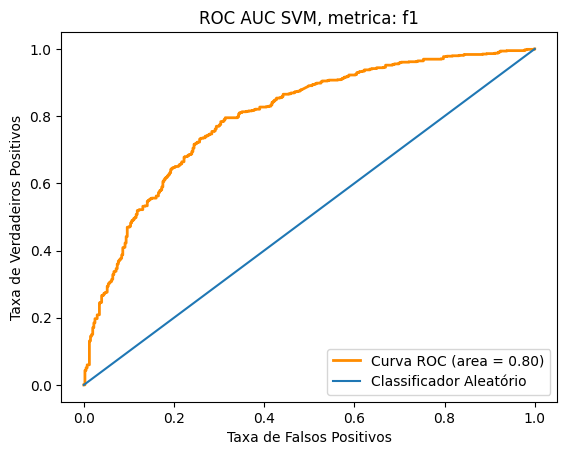

In [88]:
from sklearn.svm import SVC

#Metricas para SVM


pipe_svm = Pipeline([
    ('scaler', RobustScaler()),
    ('svm', SVC(random_state=22, probability=True))
])

model_name = "SVM"
kfold = 10

#result_df_svm, roc_auc_svm = calculate_metrics_for_model(model,model_name,X, y, kfold)

paramsGrid = {
    'svm__kernel': ['rbf', 'sigmoid', 'cosine', 'linear'],
    'svm__C': np.random.uniform(0.01, 10, 20),
    'svm__gamma': np.random.uniform(0.01, 10, 20),   
}


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=22)

result_svm_GS_full,result_svm_GS_best_by_metric  = calculate_metrics_with_CV_for_model(pipe_svm,model_name,x_train, x_test, y_train, y_test , kfold, paramsGrid)




## PARTE 5 - COMPARAÇÃO DOS MODELOS

Observando o resultado geral como uma tabela de resultados, podemos ver que com excecao do melhor resultado do SVM considerando a metrica de recall, todos os demais algoritmos obtiveram um resultado muito proximo na media. 
Para o problema em questao, a metrica que faria mais sentido seria a F1, pois ha desbalanceamento das classes e para esse problema em questao nao estamos focados em resolver o recall ou acuracia.

In [90]:

pd.set_option('display.max_colwidth', None)

final_best_results= pd.concat([result_svm_GS_best_by_metric, result_dt_GS_best_by_metric, result_rl_GS_best_by_metric], ignore_index=True)

results_best = final_best_results[["mean_test_score", "std_test_score", "metric", "model", "params"]]

results_best

mean_test_score  std_test_score     metric               model  \
0          0.763590        0.028417   accuracy                 SVM   
1          0.990728        0.005990     recall                 SVM   
2          0.793018        0.021173  precision                 SVM   
3          0.819894        0.019361         f1                 SVM   
4          0.736959        0.028583   accuracy        DecisionTree   
5          0.872885        0.058195     recall        DecisionTree   
6          0.801225        0.027825  precision        DecisionTree   
7          0.803938        0.020398         f1        DecisionTree   
8          0.743084        0.025093   accuracy  LogisticRegression   
9          0.861416        0.023737     recall  LogisticRegression   
10         0.776510        0.016150  precision  LogisticRegression   
11         0.814923        0.019054         f1  LogisticRegression   

                                                                                    params  
0   {'svm__kernel': 'rbf', 'svm__gamma': 0.4798323982687018, 'svm__C': 1.2188464254109543}  
1      {'svm__kernel': 'rbf', 'svm__gamma': 9.83360322446072, 'svm__C': 5.265361682267066}  
2    {'svm__kernel': 'rbf', 'svm__gamma': 0.3624164302554771, 'svm__C': 4.772405607247355}  
3   {'svm__kernel': 'linear', 'svm__gamma': 9.17060547463799, 'svm__C': 6.934681320808655}  
4                {'dt__max_features': 'sqrt', 'dt__max_depth': 8, 'dt__criterion': 'gini'}  
5             {'dt__max_features': 'log2', 'dt__max_depth': 4, 'dt__criterion': 'entropy'}  
6                {'dt__max_features': 'auto', 'dt__max_depth': 8, 'dt__criterion': 'gini'}  
7                {'dt__max_features': 'log2', 'dt__max_depth': 6, 'dt__criterion': 'gini'}  
8             {'rl__solver': 'liblinear', 'rl__penalty': 'l2', 'rl__C': 4.629266655933716}  
9               {'rl__solver': 'lbfgs', 'rl__penalty': 'l2', 'rl__C': 0.14939529275478922}  
10           {'rl__solver': 'liblinear', 'rl__penalty': 'l1', 'rl__C': 0.5184662580353784}  
11             {'rl__solver': 'newton-cg', 'rl__penalty': 'l2', 'rl__C': 9.97738213301169}

Se fossemos parar os treinos apenas executando o Random Grid Search com alguns parametros sendo testados, comparando todas os resultados desses testes, optando pelo F1 como metrica, vimos que a regressao logistica teve  media de 0.814923 e o SVM uma media de 0.819894. Analisando a curva ROC anteriormente plotadas  podemos observar que a curva ROC para os dois modelos tambem sao muito similares. Como o SVM e um algoritmo muito parrudo e sua performance e inferior ao de RL, acredito que a melhor opcao para esse problema em questao seria o RL com metrica F1 e os parametros:  {'rl__solver': 'newton-cg', 'rl__penalty': 'l2', 'rl__C': 9.97738213301169}.

Podemos melhorar a performance desse modelo escolhido inicialmente, a partir da analise mais detalhada de como os parametros afetam a efiencia do modelo.  


In [98]:

filtered_df = result_rl_GS_full.query('metric == "f1"')


filtered_df = filtered_df.sort_values(by='mean_test_score', ascending=False)

filtered_df[['param_rl__solver', 'param_rl__penalty', 'param_rl__C', 'mean_test_score']].head(20)



param_rl__solver param_rl__penalty param_rl__C  mean_test_score
319        liblinear                l2    9.793181         0.814923
312        newton-cg                l2    9.977382         0.814923
374        liblinear                l2    7.446836         0.814923
318        liblinear                l2     7.71807         0.814923
351        liblinear                l1    8.963609         0.814923
337        newton-cg                l2    6.841257         0.814923
378        liblinear                l2    4.629267         0.814815
355            lbfgs                l2    5.179442         0.814815
354              sag                l2     7.71807         0.814815
342        newton-cg                l2    4.629267         0.814815
359        liblinear                l2    5.475616         0.814815
364        liblinear                l2    5.179442         0.814815
301              sag                l2    4.629267         0.814815
335        liblinear                l2    5.455303         0.814815
316        liblinear                l2    3.832488         0.814815
317        newton-cg                l2    5.209133         0.814815
336        liblinear                l1    5.725738         0.814624
331            lbfgs                l2    5.821521         0.814607
326              sag                l2    2.358784         0.814598
362        newton-cg                l2    1.377729         0.814591

      mean_test_score  std_test_score metric               model  \
1268          0.81524         0.01865     f1  LogisticRegression   

                                                                         params  
1268  {'rl__C': 22.799999999999944, 'rl__penalty': 'l2', 'rl__solver': 'lbfgs'}  


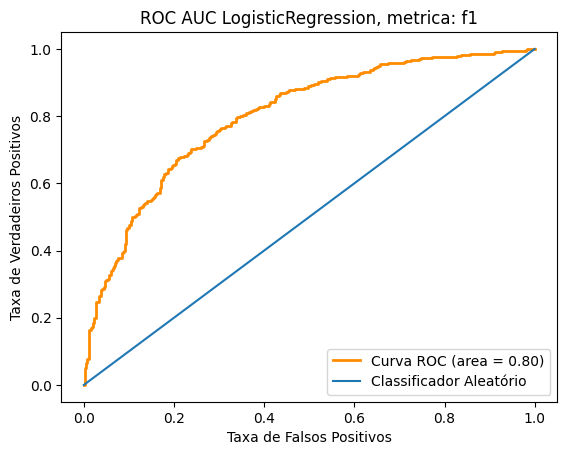

In [101]:
#Metricas para a RL
pipe_rl = Pipeline([
    ('scaler', RobustScaler()),
    ('rl', LogisticRegression(random_state=22))
])

model_name = "LogisticRegression"
kfold = 10

paramsGrid = {
    'rl__penalty': ['l1', 'l2'],
    'rl__solver': ['lbfgs', 'liblinear', 'newton-cg',  'sag'],
    'rl__C': np.arange(7, 30, 0.1),
}

# separação treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=22)


result_rl_GS_full,result_rl_GS_best_by_metric  = calculate_metrics_with_CV_for_model(pipe_rl,model_name,x_train, x_test, y_train, y_test , kfold, paramsGrid, False, ['f1'])


## PARTE 6 - ESCOLHA DO MODELO

## PARTE 7 - LINK PARA GITHUB

https://github.com/rachelreuters/posGraduacaoIA/blob/main/Classificacao/TRABALHOPD/TRABALHO_PD.ipynb